In [1]:
import numpy as np
import pandas as pd
import csv
import copy
import os
import matplotlib.pyplot as plt
import itertools

In [2]:
def open_file(p_1, p_2, p_3, p_4, p_5):
    init_data = []
    total = {}
    path = [p_1, p_2, p_3, p_4, p_5]
    # print(path)
    for p in path:
        with open(p) as csvDataFile:
            csvReader = csv.reader(csvDataFile)
            target = ['0', '0', '0', '0', '0', '0']
            for row in csvReader:
                if (target[1] + target[2]) != (row[1] + row[2]):
                    r_int = int(row[1] + row[2])
                    t_int = int(target[1] + target[2])
                    if (r_int - t_int) != 1:
                        target = row
                        init_data.append(row)
            total[p] = init_data
            init_data = []
    return total

In [3]:
def deal_with(data_in):
    collect = {}
    for x in data_in:
        h = int(x[1])
        d = int(x[4])
        m = int(x[2])
        if h >= 0 and h <= 15:
            h = h + 8
        elif h >= 16 and h <= 23:
            h = h + 8 - 24
            d = d + 1
        time = str(d) + ":" + str(h) + ":" + str(m)
        # print(time)
        collect[time] = int(x[0])
    # print(collect)
    return collect

In [4]:
def create_time_list():
    time = []
    d = [29, 30]
    h = []
    for x in range(0, 24):
        h.append(x)
    m = []
    for x in range(0, 60, 5):
        m.append(x)
    # print(h)
    # print(m)
    a = []
    for k in d:
        for x in h:
            for y in m:
                a.append(k)
                a.append(x)
                a.append(y)
                time.append(a)
                a = []
    # print(time)
    return time

In [5]:
def unite(dict_in):
    correct_dict = {}
    temp = copy.copy(time)
    # print(temp)
    length_dict = len(dict_in)
    # print(length_dict, length_time)
    pointer_time = 0
    for pointer_time in range(pointer_time, len(temp)):
        standard = [temp[pointer_time][0], temp[pointer_time][1], temp[pointer_time][2]]
        time_in = str(temp[pointer_time][0]) + ":" + str(temp[pointer_time][1]) + ":" + str(temp[pointer_time][2])
        for key in dict_in.copy().keys():
            key2 = key.split(":")
            k = [int(key2[0]), int(key2[1]), int(key2[2])]
            # print()
            # print("k", k)
            # print("standard", standard)
            if k[0] == standard[0]:
                if k[1] == standard[1]:
                    if k[2] <= standard[2]:
                        # print("get in")
                        correct_dict[time_in] = dict_in[key]
                        # print(correct_dict)
                        del dict_in[key]
                    else:
                        break
                elif k[1] < standard[1]:
                    # print("get in")
                    correct_dict[time_in] = dict_in[key]
                    # print(correct_dict)
                    del dict_in[key]
                else:
                    break
            elif k[0] < standard[0]:
                # print("get in")
                correct_dict[time_in] = dict_in[key]
                # print(correct_dict)
                del dict_in[key]
            else:
                break
        pointer_time = pointer_time + 1
    # print(correct_dict)
    return correct_dict

In [6]:
def find_end(time_end):
    time = {}
    num = 1
    for x in time_end:
        x = x.split(":")
        day = int(x[0])
        hour = int(x[1])
        minute = int(x[2])
        time[num] = [day, hour, minute]
        num  = num + 1
    m_s = 60
    for x in time.items():
        if m_s > x[1][2]:
            m_s = x[1][2]
    return str(time[1][0]) + ":" + str(time[1][1]) + ":" + str(m_s)

In [7]:
def find_start(time_start):
    time = {}
    num = 1
    for x in time_start:
        x = x.split(":")
        day = int(x[0])
        hour = int(x[1])
        minute = int(x[2])
        # print(dat, hour, minute)
        time[num] = [day, hour, minute]
        num  = num + 1
    m_s = 0
    for x in time.items():
        if m_s < x[1][2]:
            m_s = x[1][2]
    return str(time[1][0]) + ":" + str(time[1][1]) + ":" + str(m_s)

In [8]:
def low_high_bound(i_38, i_42, i_43, i_47, i_99):
    first = [i_38[0], i_42[0], i_43[0], i_47[0], i_99[0]]
    last = [i_38[-1], i_42[-1], i_43[-1], i_47[-1], i_99[-1]]
    # print(first)
    # print(last)
    start = find_start(first)
    end = find_end(last)
    return (start, end)

In [9]:
def check(start, end, id_dict):
    ans = {}
    pos = 0
    list_in = copy.copy(list(id_dict))
    for i in list_in[:]:
        pos = pos + 1
        if i == start:
            delete_pos = pos-1
            for i in range(0, delete_pos):
                del id_dict[list_in[i]]
        if i == end:
            delete_pos = pos+1
            for i in range(delete_pos-1, len(list_in)):
                del id_dict[list_in[i]]
    # print(id_dict)
    return id_dict

In [10]:
def reshape(data, title):
    df = pd.DataFrame({title:np.array(list(data.values()))}, index = np.array(list(data.keys())))
    df.index = pd.to_datetime(df.index, format = '%d:%H:%M')
    df = df.resample('5min').mean()
    # print(df)
    return df

In [11]:
def scatterplot_matrix(data, names, **kwargs):
    """Plots a scatterplot matrix of subplots.  Each row of "data" is plotted
    against other rows, resulting in a nrows by nrows grid of subplots with the
    diagonal subplots labeled with "names".  Additional keyword arguments are
    passed on to matplotlib's "plot" command. Returns the matplotlib figure
    object containg the subplot grid."""
    numvars, numdata = data.shape
    fig, axes = plt.subplots(nrows=numvars, ncols=numvars, figsize=(12,12))
    fig.subplots_adjust(hspace=0.0001, wspace=0.0001)

    for ax in axes.flat:
        # Hide all ticks and labels
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)

        # Set up ticks only on one side for the "edge" subplots...
        if ax.is_first_col():
            ax.yaxis.set_ticks_position('left')
        if ax.is_last_col():
            ax.yaxis.set_ticks_position('right')
        if ax.is_first_row():
            ax.xaxis.set_ticks_position('top')
        if ax.is_last_row():
            ax.xaxis.set_ticks_position('bottom')

    # Plot the data.
    for i, j in zip(*np.triu_indices_from(axes, k=1)):
        for x, y in [(i,j), (j,i)]:
            axes[x,y].plot(data[x], data[y], **kwargs)

    # Label the diagonal subplots...
    for i, label in enumerate(names):
        axes[i,i].annotate(label, (0.1, 0.1), xycoords='axes fraction',
                ha='center', va='center')

    # Turn on the proper x or y axes ticks.
    for i, j in zip(range(numvars), itertools.cycle((-1, 0))):
        axes[j,i].xaxis.set_visible(True)
        axes[i,j].yaxis.set_visible(True)

    return fig


In [13]:
path1 = '/Users/heng/Intern/3:29 13~3:30 22/38_data_out'
path2 = '/Users/heng/Intern/3:29 13~3:30 22/42_data_out'
path3 = '/Users/heng/Intern/3:29 13~3:30 22/43_data_out'
path4 = '/Users/heng/Intern/3:29 13~3:30 22/47_data_out'
path5 = '/Users/heng/Intern/3:29 13~3:30 22/99_data_out'
total_data = open_file(path1, path2, path3, path4, path5)
# print(total_data)

In [14]:
id_38 = deal_with(total_data[path1])
id_42 = deal_with(total_data[path2])
id_43 = deal_with(total_data[path3])
id_47 = deal_with(total_data[path4])
id_99 = deal_with(total_data[path5])

In [15]:
time = create_time_list()

In [16]:
id_38_done = unite(id_38)
id_42_done = unite(id_42)
id_43_done = unite(id_43)
id_47_done = unite(id_47)
id_99_done = unite(id_99)

In [17]:
(s, e) = low_high_bound(list(id_38_done), list(id_42_done), list(id_43_done), list(id_47_done), list(id_99_done))
# print(s, e)

In [18]:
id_38_done = check(s, e, id_38_done)
id_42_done = check(s, e, id_42_done)
id_43_done = check(s, e, id_43_done)
id_47_done = check(s, e, id_47_done)
id_99_done = check(s, e, id_99_done)

In [19]:
df1 = reshape(id_38_done, "38_d")
df2 = reshape(id_42_done, "42_d")
df3 = reshape(id_43_done, "43_d")
df4 = reshape(id_47_done, "47_d")
df5 = reshape(id_99_done, "99_d")

In [20]:
df = pd.concat([df1, df2, df3, df4, df5], axis = 1) 

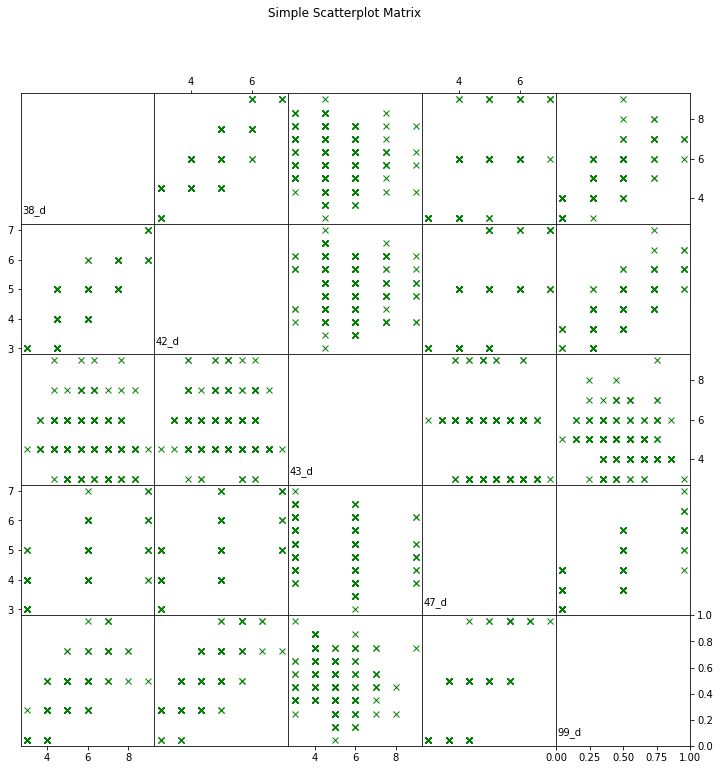

In [27]:
SUM_data = []
SUM_data.append(list(df["38_d"]))
SUM_data.append(list(df["42_d"]))
SUM_data.append(list(df["43_d"]))
SUM_data.append(list(df["47_d"]))
SUM_data.append(list(df["99_d"]))
SUM_data = np.array(SUM_data) 
fig = scatterplot_matrix(SUM_data, ['38_d', '42_d', '43_d', '47_d', '99_d'], linestyle='none', marker='x', color='green', mfc='none')
fig.suptitle('Simple Scatterplot Matrix')
plt.savefig('scatter_plot_matrix')
plt.show()

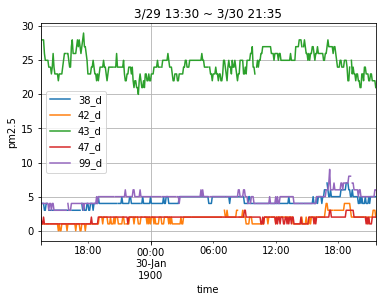

In [22]:
df = df.astype(float)
df.plot()
plt.title('3/29 13:30 ~ 3/30 21:35')
plt.grid(True)
plt.xlabel("time") 
plt.ylabel("pm2.5")
plt.savefig('all_id')
plt.show()

In [23]:
# df

In [24]:
total_std = []
average = []
for x in range(0, 386):
    row = np.array(df.iloc[x])
    # print("row", row)
    std = row.std()
    avg = row.mean()
    total_std.append(std)
    average.append(avg)
total_std = np.array(total_std)
average = np.array(average)
t = pd.Series(total_std)
a = pd.Series(average)
CV = total_std / average

In [25]:
df.describe()

,38_d,42_d,43_d,47_d,99_d
count,377.000000,373.000000,379.000000,378.000000,376.000000
mean,4.302387,1.697051,24.432718,1.777778,4.816489
std,0.764101,0.741922,1.686418,0.492203,0.885946
min,3.000000,0.000000,20.000000,1.000000,3.000000
25%,4.000000,1.000000,23.000000,1.000000,4.000000
50%,4.000000,2.000000,24.000000,2.000000,5.000000
75%,5.000000,2.000000,26.000000,2.000000,5.000000
max,7.000000,4.000000,29.000000,3.000000,9.000000


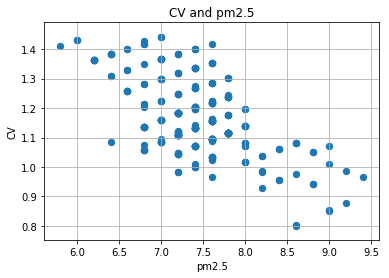

In [26]:
df_CV = pd.DataFrame({"CV": CV}, index = average)
plt.scatter(average, CV, marker = "o", s = 40)
plt.grid(True)
plt.title("CV and pm2.5")
plt.xlabel("pm2.5") 
plt.ylabel("CV")
plt.savefig('all_CV')
plt.show()